# Data Wrangling

<h2> Import library & initial config </h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

%matplotlib inline 


In [2]:
pd.options.display.float_format ='{:,.1f}'.format

In [3]:
!ls

'Ingeniero de Datos y Administrador de Datos.docx'   segmentacion.csv
 Porve.ipynb


<h2>Import data</h2>

Uso de la libreria de Pandas para trabajar con Dataframes, uso de separador con '**;**' y codificado con un que no generara errores al usar la fusión de pd.read_csv

In [4]:
path = 'segmentacion.csv'
df = pd.read_csv(path, delimiter=';', encoding='cp1252')

Uso del método <b> head () </b> para mostrar las primeras cinco filas del marco de datos, por la cantidad de columnas mostraron en 2 celdas diferentes.

In [5]:
df.iloc[:,:20].head(5)

,mcodes,terminal,estado_terminal,producto_red,tecnologiapp,modelopp,tecnologiaaf,modeloaf,browser,nombretipoter,grupo_version,fecha_version,mcc,segmento_actual,grupo_version_ant,ciudadfin,seccionalfin,fecha_creacion_terminal,trx_dia_cero,trx_dia_uno
0,348443760,1806A6M9U356211,Activo,h,a,p,b,j,o,f,h,6/12/2018,es,ae,k,BOGOTÁ,BOGOTA,5/12/2018,123,117
1,348646977,1375A6MM7263427,Activo,q,c,c,d,h,p,p,l,NaN,q,f,k,CALI,CALI,6/12/2018,0,0
2,212187780,125741149382240,Activo,m,a,p,b,j,o,k,h,20/11/2017,es,ae,f,BOGOTÁ,BOGOTA,16/11/2017,0,0
3,214878384,1104S0148347454,Activo,t,b,t,c,l,o,i,h,14/08/2017,es,ae,h,BOGOTÁ,BOGOTA,12/04/2014,0,0
4,214371423,125849396128146,Activo,h,a,p,a,j,o,f,h,4/02/2017,q,f,e,BOGOTÁ,BOGOTA,9/12/2008,12,33


In [6]:
df.iloc[:,20:].head(5)

,trx_dia_dos,trx_dia_tres,trx_dia_cuatro,trx_dia_cinco,trx_dia_seis,trx_mes_tres,trx_mes_dos,trx_mes_uno,prom_mes_tres,prom_mes_dos,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1,fecha_compra,inicio_actividades_pos,fecha_Full
0,111,132,144,150,0,0,0,3582,0,0,"38,51612903",1,0,0,0,2018-10-30 00:00:00.000,6/12/2018,31/12/2018
1,0,0,0,0,0,0,0,21,0,0,"0,225806452",1,0,0,0,2018-03-27 00:00:00.000,10/12/2018,31/12/2018
2,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,2013-04-02 00:00:00.000,19/09/2018,31/12/2018
3,24,0,18,36,3,24,282,429,"0,266666667","3,133333333","4,612903226",6,0,5,12,2012-09-27 00:00:00.000,22/05/2018,31/12/2018
4,27,30,24,9,9,393,363,900,"4,366666667","4,033333333","9,677419355",1,0,0,0,2012-06-14 00:00:00.000,9/08/2018,31/12/2018


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


<h3 id="identify_missing_values">Identify missing values</h3>

Usando la función isnull() seobtiene una salida con un valor booleano que indica si el valor que se pasa al argumento es, de hecho, datos faltantes.

Usando un bucle for, podemos calcular rápidamente el número de valores faltantes en cada columna. Como se mencionó anteriormente, "True" representa un valor perdido, "Falso" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts ()" cuenta el número de valores "Verdaderos".

**_ANALISIS:_** Se puede observar que en todos los datos no se presentaron valores faltantes, la funcion isnull()=False para todo el Dataframe   

In [7]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

mcodes
False    99999
Name: mcodes, dtype: int64

terminal
False    99999
Name: terminal, dtype: int64

estado_terminal
False    99999
Name: estado_terminal, dtype: int64

producto_red
False    99999
Name: producto_red, dtype: int64

tecnologiapp
False    99999
Name: tecnologiapp, dtype: int64

modelopp
False    99999
Name: modelopp, dtype: int64

tecnologiaaf
False    99999
Name: tecnologiaaf, dtype: int64

modeloaf
False    99999
Name: modeloaf, dtype: int64

browser
False    99999
Name: browser, dtype: int64

nombretipoter
False    99999
Name: nombretipoter, dtype: int64

grupo_version
False    99999
Name: grupo_version, dtype: int64

fecha_version
False    61796
True     38203
Name: fecha_version, dtype: int64

mcc
False    99999
Name: mcc, dtype: int64

segmento_actual
False    99999
Name: segmento_actual, dtype: int64

grupo_version_ant
False    99999
Name: grupo_version_ant, dtype: int64

ciudadfin
False    99999
Name: ciudadfin, dtype: int64

seccionalfin
False    99999
Name: s

<h3 id = "deal_missing_values"> Resolver los datos faltantes  </h3>

Dado que no se presentaron datos faltantes, no es necesario aplicar ninguna de las tecnicas enumeradas a continuacion.

<ol>
     <li> Eliminar datos <br>
         a. soltar toda la fila <br>
         B. suelta toda la columna
     </li>
     <li> Reemplazar datos <br>
         a. reemplázalo valor media <br>
         B. reemplácelo por frecuencia <br>
         C. reemplazarlo en función de otras funciones
     </li>
</ol>

<h3 id = "correct_data_format"> Formato de datos correcto </h3>
Se verifica que todos los datos estén en el formato correcto (int, float, text, date, etx).
Se hace uso de de la función .dtypes(), en esta caso use .info() dado que nos entrega información adicional.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   mcodes                   99999 non-null  int64 
 1   terminal                 99999 non-null  object
 2   estado_terminal          99999 non-null  object
 3   producto_red             99999 non-null  object
 4   tecnologiapp             99999 non-null  object
 5   modelopp                 99999 non-null  object
 6   tecnologiaaf             99999 non-null  object
 7   modeloaf                 99999 non-null  object
 8   browser                  99999 non-null  object
 9   nombretipoter            99999 non-null  object
 10  grupo_version            99999 non-null  object
 11  fecha_version            61796 non-null  object
 12  mcc                      99999 non-null  object
 13  segmento_actual          99999 non-null  object
 14  grupo_version_ant        99999 non-nul

In [9]:
df['fecha_Full'] = pd.to_datetime(df['fecha_Full']).dt.date
df['inicio_actividades_pos'] = pd.to_datetime(df['inicio_actividades_pos']).dt.date
df['fecha_creacion_terminal'] = pd.to_datetime(df['fecha_creacion_terminal']).dt.date

In [10]:
df['prom_mes_tres'] = df['prom_mes_tres'].str.replace(',', '.').astype(float)
df['prom_mes_dos'] = df['prom_mes_dos'].str.replace(',', '.').astype(float)
df['prom_mes_uno'] = df['prom_mes_uno'].str.replace(',', '.').astype(float)

 <font size="3">  *Verificamos que los formatos que se cambiaron se hayan realizado, en casos de algunas variables fue necesario reemplazar la coma por el punto decimal dado que python recibe valores flotantes de esa forma* </font> 

In [11]:
df[['prom_mes_tres','prom_mes_dos','prom_mes_uno']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prom_mes_tres  99999 non-null  float64
 1   prom_mes_dos   99999 non-null  float64
 2   prom_mes_uno   99999 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


<font size="3"> *Los datos se agrupan en función de una o varias variables, estas variables pueden permitir un analisis posterior, con la funcion nunique() se puede obtener la cantidad de variables que son diferentes en cada columna, en este caso solo se tendran encuenta las columnas de typo Object excluyendo las fechas* </font> 

In [12]:
for column in df.columns.values.tolist():
    if df[column].dtypes=='object' and not 'fecha' in column:
        print(column,':', df[column].nunique(), 'categorias')

terminal : 99999 categorias
estado_terminal : 2 categorias
producto_red : 65 categorias
tecnologiapp : 6 categorias
modelopp : 23 categorias
tecnologiaaf : 5 categorias
modeloaf : 13 categorias
browser : 15 categorias
nombretipoter : 21 categorias
grupo_version : 12 categorias
mcc : 149 categorias
segmento_actual : 31 categorias
grupo_version_ant : 11 categorias
ciudadfin : 852 categorias
seccionalfin : 24 categorias
inicio_actividades_pos : 720 categorias


 <font size="3"> *Ahora se hace una analisis con de las variables de tipo numerico, la funcion **describe()** da la informacion estadistica mas fundamental que nos ayudara con el analisis* </font> 

In [13]:
df.describe()

,mcodes,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,trx_dia_cuatro,trx_dia_cinco,trx_dia_seis,trx_mes_tres,trx_mes_dos,trx_mes_uno,prom_mes_tres,prom_mes_dos,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1
count,"99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0","99,999.0"
mean,"295,125,958.8",15.9,13.7,19.3,21.0,18.5,18.0,6.8,491.2,507.0,565.3,5.5,5.6,6.1,32.4,0.6,0.3,0.2
std,"76,527,054.7",290.5,403.2,398.2,584.9,441.9,415.5,403.2,"15,826.0","19,917.6","14,476.1",175.8,221.3,155.7,241.9,2.8,1.4,1.2
min,"210,000.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,"273,398,160.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,"325,322,886.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,18.0,30.0,0.2,0.2,0.3,1.0,0.0,0.0,0.0
75%,"339,554,733.0",3.0,3.0,6.0,9.0,6.0,6.0,0.0,156.0,171.0,243.0,1.7,1.9,2.6,3.0,0.0,0.0,0.0
max,"1,449,224,742.0","62,991.0","101,682.0","90,813.0","160,686.0","98,379.0","94,431.0","105,207.0","3,230,361.0","5,065,884.0","3,330,678.0","35,892.9","56,287.6","35,813.7","3,126.0",37.0,26.0,27.0


 <font size="3"> *Del analisis realizado de la variables en la seccion del **DICCIONARIO** en el archivo **.docx**, se decidio profundizar en la variable **estado_terminal** ya que podria entregar información que aporte poco o genere un sesgo en el analisis posterior* </font> 

In [14]:
pd.get_dummies(df["estado_terminal"]).sum()

Activo       91762
Bloqueado     8237
dtype: int64

In [15]:
df[df['estado_terminal']=='Bloqueado'].describe()

,mcodes,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,trx_dia_cuatro,trx_dia_cinco,trx_dia_seis,trx_mes_tres,trx_mes_dos,trx_mes_uno,prom_mes_tres,prom_mes_dos,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1
count,"8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0","8,237.0"
mean,"301,228,560.3",0.1,0.1,0.1,0.2,0.2,0.2,0.0,9.2,7.9,7.2,0.1,0.1,0.1,48.1,0.3,0.1,0.2
std,"57,295,299.9",5.2,3.2,5.4,8.7,7.6,8.1,1.0,132.9,127.7,156.0,1.5,1.4,1.7,202.5,1.5,0.9,1.1
min,"210,000.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,"285,709,725.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,"319,598,685.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,"332,931,144.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
max,"1,449,224,742.0",429.0,186.0,444.0,714.0,657.0,684.0,57.0,"8,781.0","8,343.0","11,610.0",97.6,92.7,124.8,"3,126.0",37.0,25.0,27.0


 <font size="3"> *De las 2 tablas generadas anteriormente se observa que la columna **estado_terminal** con la categoria **Bloqueado** no presenta valores significativos en casi todas las columnas que fueron analizadas, la media (MEAN) en cada tabla muestra que no son valores comparables, esto puede generar un sesgo dado que se puede interpretar como que no funcionaron en ese periodo o en parte de este en la mayoria de las muestras con esta categoria.*
    
 <font size="3"> *A continuacion se procede a trabajar solo con la categoria* **Activo**  </font> 

In [16]:
df_filter = df[df['estado_terminal']=='Activo']

 <font size="3"> *Otra columna a tener en cuenta es **inicio_actividades_pos**, dado que muestra que en todo el periodo de estudio no se mantuvo siempre activas la misma cantidad de terminales, en este momento no se modificara el dataframe pero sera tenido en cuenta mas adelante* </font> 

In [17]:
antes_3_meses = len( df_filter[df_filter['inicio_actividades_pos']<=datetime.date(year=2018,month=9,day=30)] )
antes_2_meses = len( df_filter[df_filter['inicio_actividades_pos']<=datetime.date(year=2018,month=10,day=31)] )
antes_1_meses = len( df_filter[df_filter['inicio_actividades_pos']<=datetime.date(year=2018,month=11,day=30)] )

print('Cantidad de terminales funcionando antes de 3 meses: {}'.format(antes_3_meses))
print('Cantidad de terminales funcionando antes de 2 meses: {}'.format(antes_2_meses))
print('Cantidad de terminales funcionando antes de 1 mes: {}'.format(antes_1_meses))

Cantidad de terminales funcionando antes de 3 meses: 65507
Cantidad de terminales funcionando antes de 2 meses: 80141
Cantidad de terminales funcionando antes de 1 mes: 86369


 <font size="3"> *Se selecciono las columnas que se consideraban de mayor valor para hacer el analisis subsequente* </font> 

In [18]:
df_soft = df_filter.loc[:,['mcodes','producto_red','mcc','segmento_actual','ciudadfin','seccionalfin', \
                    'trx_dia_cero','trx_dia_uno','trx_dia_dos','trx_dia_tres','trx_dia_cuatro','trx_dia_cinco','trx_dia_seis', \
                   'trx_mes_tres','trx_mes_dos','trx_mes_uno','prom_mes_tres','prom_mes_dos','prom_mes_uno',\
                   'total_terminales', 'cantidad_falla_m3', 'cantidad_falla_m2', 'cantidad_falla_mes1', \
                    'inicio_actividades_pos','fecha_Full']]

In [19]:
df_soft.head(5)

,mcodes,producto_red,mcc,segmento_actual,ciudadfin,seccionalfin,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,...,trx_mes_uno,prom_mes_tres,prom_mes_dos,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1,inicio_actividades_pos,fecha_Full
0,348443760,h,es,ae,BOGOTÁ,BOGOTA,123,117,111,132,...,3582,0.0,0.0,38.5,1,0,0,0,2018-06-12,2018-12-31
1,348646977,q,q,f,CALI,CALI,0,0,0,0,...,21,0.0,0.0,0.2,1,0,0,0,2018-10-12,2018-12-31
2,212187780,m,es,ae,BOGOTÁ,BOGOTA,0,0,0,0,...,0,0.0,0.0,0.0,4,0,0,1,2018-09-19,2018-12-31
3,214878384,t,es,ae,BOGOTÁ,BOGOTA,0,0,24,0,...,429,0.3,3.1,4.6,6,0,5,12,2018-05-22,2018-12-31
4,214371423,h,q,f,BOGOTÁ,BOGOTA,12,33,27,30,...,900,4.4,4.0,9.7,1,0,0,0,2018-09-08,2018-12-31


 <font size="3"> *Con el dataframe filtrado se repite el proceso para obtener las categorias por cada columna, esta vez de forma mas detallada con algunas de esas categorias* </font> 

In [20]:
for column in df_soft.columns.values.tolist():
    if df[column].dtypes=='object' and not 'fecha' in column:
        print(column,':', df_soft[column].nunique(), 'categorias')
        print (df_soft[column].value_counts())
        print("")    

producto_red : 65 categorias
h     23431
i     13266
m      8795
s      6965
f      5647
      ...  
d         1
e         1
bk        1
au        1
bg        1
Name: producto_red, Length: 65, dtype: int64

mcc : 147 categorias
es    6710
cc    6276
ba    5997
bd    5091
do    4787
      ... 
cg       1
bz       1
ek       1
cr       1
et       1
Name: mcc, Length: 147, dtype: int64

segmento_actual : 31 categorias
n     25950
ae     7211
ab     6276
h      5997
j      5091
v      4787
x      3962
g      3961
p      3514
k      2482
b      2403
w      2364
q      2257
l      2063
u      2063
f      1891
o      1829
ac     1444
m      1330
c      1244
r       681
z       583
d       473
a       470
y       367
i       311
aa      290
s       270
t       101
e        66
ad       31
Name: segmento_actual, dtype: int64

ciudadfin : 839 categorias
BOGOTÁ                 29481
MEDELLÍN                8122
CALI                    7718
BARRANQUILLA            4003
CARTAGENA               2671


<h2 id = "pattern_visualization"> Analizar patrones de características individuales mediante visualización </h2>

 <font size="3"> *Se puede calcular la correlación entre variables de tipo "int64" o "float64" usando el método "corr()" y usar la matriz que retorna para obtener un grafico de correlaciones* </font> 

<AxesSubplot:>

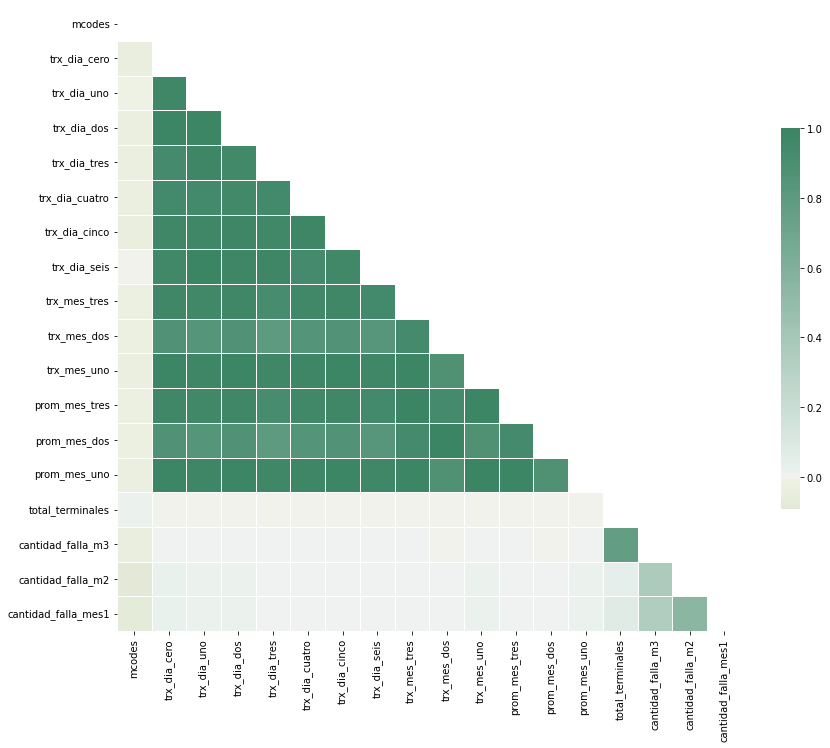

In [21]:
# Compute the correlation matrix
corr = df_soft.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 150, n=10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

 <font size="3"> *Se oberva una correlacion mas notables entre las columnas relacionadas con el promedio de transacciones que se hicieron durante los dias antes de la observacion, asi como, con las transacciones de meses antes y el promedio de estas, tambien se observa relacion con en la columnas de fallas en los diferentes meses, esto tiene sentido puesto que no se espera que hayan cambios significativos en estos registros de un dia para otro o de un mes para otro* </font> 

 <font size="3"> *Los graficos siguientes nos permite ver la existencia de la correlacion entre la cantidad de transacciones en diferentes dias, es importante analizar que algunos datos que se podrian considerar **outliers** se siguen conservando en diferentes dias, por lo que no se consideran como errores per se, por esto se seguira teniendo en cuenta estos datos para analisis posteriores* </font> 

Text(0.5, 1.0, 'Cantidad de transacciones dia de la observacion vs 6 dias antes')

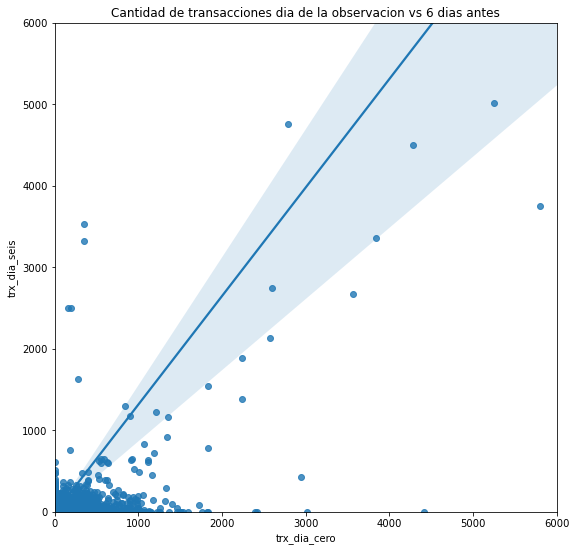

In [22]:
f, ax = plt.subplots(figsize=(9, 9))
sns.regplot(x='trx_dia_cero', y='trx_dia_seis', data=df_soft)
plt.ylim(0,6000)
plt.xlim(0,6000)
plt.title('Cantidad de transacciones dia de la observacion vs 6 dias antes')

Text(0.5, 1.0, 'Cantidad de transacciones: dia de la observacion vs promedio del mes de observacion')

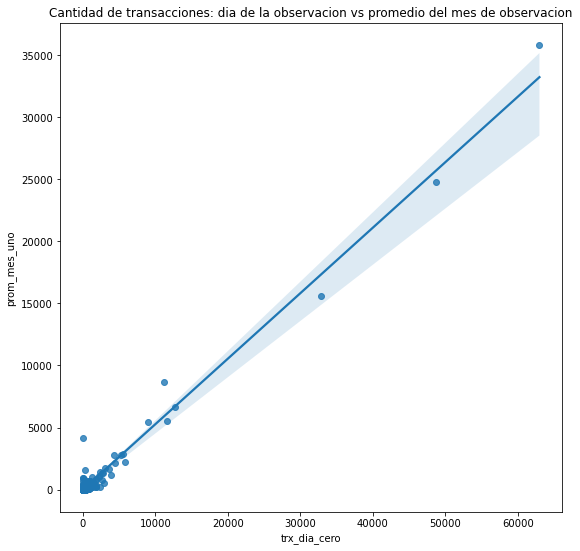

In [23]:
f, ax = plt.subplots(figsize=(9, 9))
sns.regplot(x='trx_dia_cero', y='prom_mes_uno', data=df_soft)
plt.title('Cantidad de transacciones: dia de la observacion vs promedio del mes de observacion')

f, ax = plt.subplots(figsize=(9, 9))
sns.regplot(x='prom_mes_uno', y='prom_mes_tres', data=df_soft)

 <font size="3"> *En las 2 graficas siguientes se observan las cantidad de fallos en diferentes meses, siendo el mes de noviembre, el mes con una menor cantidad de fallas en promedio* </font> 

[Text(0.5, 1.0, 'Fallas noviembre vs octubre'),
 Text(0.5, 0, 'Cantidad de fallas noviembre'),
 Text(0, 0.5, 'Cantidad de fallas octubre')]

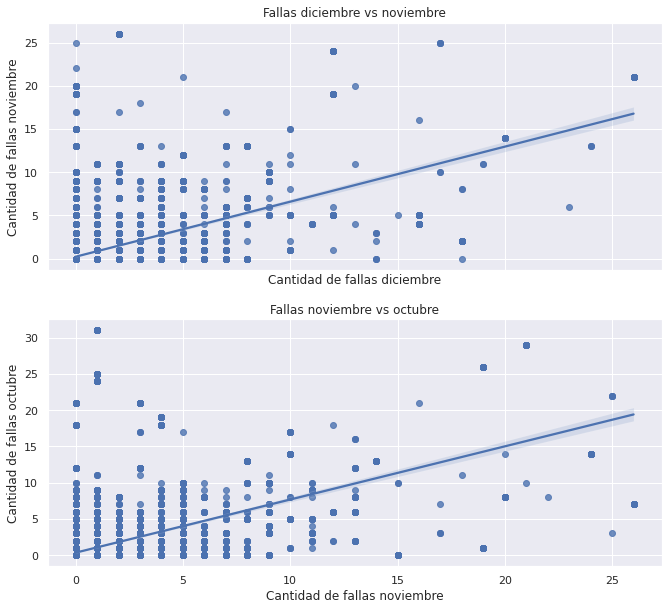

In [24]:
sns.set(rc={'figure.figsize':(11,10)})
f, (ax_reg1, ax_reg2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.5, .5)})
sns.regplot(x='cantidad_falla_mes1', y='cantidad_falla_m2', data=df_soft, ax=ax_reg1)
ax_reg1.set(title='Fallas diciembre vs noviembre', xlabel='Cantidad de fallas diciembre', \
            ylabel='Cantidad de fallas noviembre')

sns.regplot(x='cantidad_falla_m2', y='cantidad_falla_m3', data=df_soft, ax=ax_reg2)
ax_reg2.set(title='Fallas noviembre vs octubre', xlabel='Cantidad de fallas noviembre', \
            ylabel='Cantidad de fallas octubre')

 <font size="3">  </font> 

 <font size="3">  </font> 

## Analisis de puntos sin uso

<font size="3"> *Para conocer mas acerca del funcionamiento de las terminales se considero analizar los meses en los que no se llevaron a cabo transacciones por estos medios y se tuvo de muestra las ciudades donde se presento mayoritariamente este fenomeno, en ese sentido se tomaron las ciudades donde habian mas de 300 puntos que no fueron utilizados durante cada mes y al final fueron promediados* </font> 

In [25]:
def f_filter(x):
    return (x['mcodes']).count() > 300

df_ciudad_sin_transacciones_diciembre = df_soft[df_soft['prom_mes_uno'] == 0 ]
df_Topciudad_sin_transacciones_diciembre =  df_ciudad_sin_transacciones_diciembre.groupby(['ciudadfin']).filter(f_filter)

In [26]:
df_Topciudad_sin_transacciones_diciembre.rename(columns={'mcodes': 'sinUsoDiciembre'}, inplace=True)
df_Topciudad_sin_transacciones_diciembre = df_Topciudad_sin_transacciones_diciembre[['ciudadfin','sinUsoDiciembre']] \
.groupby('ciudadfin').count()

In [27]:
df_ciudad_sin_transacciones_noviembre = df_soft[df_soft['prom_mes_dos'] == 0 ]
df_Topciudad_sin_transacciones_noviembre =  df_ciudad_sin_transacciones_noviembre.groupby(['ciudadfin']).filter(f_filter)
df_Topciudad_sin_transacciones_noviembre.rename(columns={'mcodes': 'sinUsoNoviembre'}, inplace=True)
df_Topciudad_sin_transacciones_noviembre = df_Topciudad_sin_transacciones_noviembre[['ciudadfin','sinUsoNoviembre']].groupby('ciudadfin').count()

In [28]:
df_ciudad_sin_transacciones_octubre = df_soft[df_soft['prom_mes_dos'] == 0 ]
df_Topciudad_sin_transacciones_octubre =  df_ciudad_sin_transacciones_octubre.groupby(['ciudadfin']).filter(f_filter)
df_Topciudad_sin_transacciones_octubre.rename(columns={'mcodes': 'sinUsoOctubre'}, inplace=True)
df_Topciudad_sin_transacciones_octubre = df_Topciudad_sin_transacciones_octubre[['ciudadfin','sinUsoOctubre']].groupby('ciudadfin').count()

In [29]:
df_Topciudad_sin_transacciones = df_Topciudad_sin_transacciones_diciembre \
.join(df_Topciudad_sin_transacciones_noviembre, on=None, how='inner') \
.join(df_Topciudad_sin_transacciones_octubre, on=None, how='inner')
df_Topciudad_sin_transacciones

,sinUsoDiciembre,sinUsoNoviembre,sinUsoOctubre
ciudadfin,,,
BARRANQUILLA,1120,1208,1208
BOGOTÁ,11076,11871,11871
BUCARAMANGA,671,767,767
CALI,2879,3105,3105
CARTAGENA,818,934,934
CHÍA,411,455,455
MANIZALES,316,370,370
MEDELLÍN,2399,2624,2624
PEREIRA,381,423,423


 <font size="3"> *Se busca obtener las ciudades que presentaron un menor uso de esta tecnologia, durante cada mes se obtuvo un listado de las ciudades que presentaban mayores puntos sin uso, al tener informacion de 3 meses se decidio hacer una union entre los 3 meses y obtener el promedio para consolidar una sola tabla* </font> 

In [30]:
df_Topciudad_sin_transacciones = df_Topciudad_sin_transacciones \
.apply(lambda x: x.mean(), axis=1).to_frame().rename(columns={0:'sinUso'})
df_Topciudad_sin_transacciones

,sinUso
ciudadfin,
BARRANQUILLA,"1,178.7"
BOGOTÁ,"11,606.0"
BUCARAMANGA,735.0
CALI,"3,029.7"
CARTAGENA,895.3
CHÍA,440.3
MANIZALES,352.0
MEDELLÍN,"2,549.0"
PEREIRA,409.0


 <font size="3"> *Al analizar la tabla se observa que las principales ciudades del pais estan consentrada una mayor cantidad de terminales que no presentaron uso durante un tiempo significativo* </font> 

Text(0, 0.5, '')

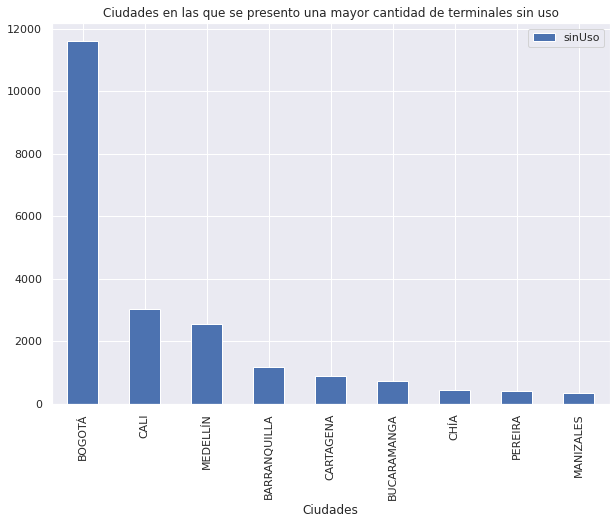

In [31]:
df_Topciudad_sin_transacciones.sort_values(['sinUso'], ascending=False) \
.plot(figsize=(10,7), kind='bar', stacked=True, sort_columns=True)
plt.title('Ciudades en las que se presento una mayor cantidad de terminales sin uso')
plt.xlabel('Ciudades')
plt.ylabel('')

 <font size="3">  </font> 

 <font size="3">  </font> 


## Analisis de fallas en terminales

<font size="3"> *En esta seccion se busca encontrar si hay o no una relacion entre las **fallas en los terminales** y las **transacciones** durante los meses de octubre a diciembre, para esto en un principio se va a realizar unos filtros que buscan dejarnos solo con las muestras en los cuales se presentaron fallas y ademas que tuvieron transacciones durantes los respectivos meses* </font> 

In [32]:
df_fallas = df_soft[(df_soft['cantidad_falla_mes1'] != 0) & 
                                     (df_soft['cantidad_falla_m2'] != 0) & 
                                     (df_soft['cantidad_falla_m3'] != 0) &
                                     (df_soft['prom_mes_uno'] > 0) & 
                                     (df_soft['prom_mes_dos'] > 0)  & 
                                     (df_soft['prom_mes_tres'] > 0)]
df_fallas.sample(5)

,mcodes,producto_red,mcc,segmento_actual,ciudadfin,seccionalfin,trx_dia_cero,trx_dia_uno,trx_dia_dos,trx_dia_tres,...,trx_mes_uno,prom_mes_tres,prom_mes_dos,prom_mes_uno,total_terminales,cantidad_falla_m3,cantidad_falla_m2,cantidad_falla_mes1,inicio_actividades_pos,fecha_Full
99599,224646744,m,g,b,BOGOTÁ,BOGOTA,0,0,0,18,...,231,2.9,1.2,2.5,21,6,3,2,2018-10-01,2018-12-31
4622,320226711,i,eg,n,BOGOTÁ,BOGOTA,15,24,63,12,...,762,9.3,14.7,8.2,35,1,2,4,2018-02-28,2018-12-31
28061,335735001,i,au,g,MEDELLÍN,MEDELLIN,57,39,51,60,...,819,4.0,5.0,8.8,10,1,4,1,2018-07-12,2018-12-31
99790,219924159,m,do,v,BUCARAMANGA,BUCARAMANGA,21,27,12,3,...,252,5.9,2.4,2.7,10,5,4,3,2018-05-12,2018-12-31
70381,306292896,i,bd,j,BOGOTÁ,BOGOTA,0,0,0,0,...,27,1.1,0.2,0.3,3,1,1,1,1900-01-01,2018-12-31


 <font size="3"> *En el diagrama de correlaciones siguiente se puede observar como incrementa este valor en comparacion con que que se hizo anteriormente, en las columnas de fallas y las transacciones se observa una correlación que no es muy fuerte pero partir de esto va permitir trabajar con algunas variables,y encontrar informacion importante posterior a este analisis* </font> 

<AxesSubplot:>

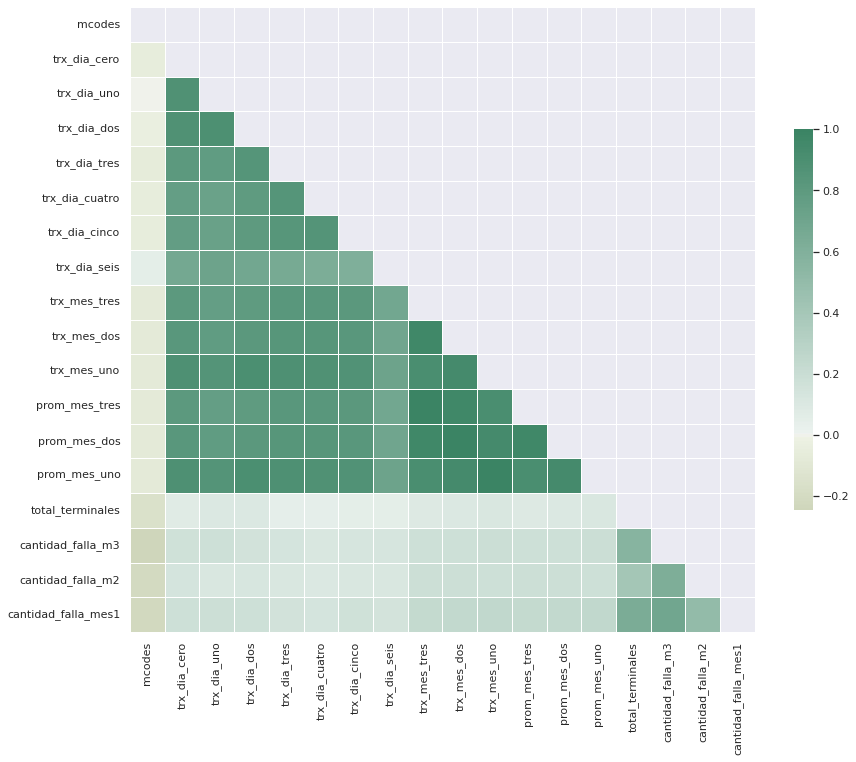

In [33]:
# Compute the correlation matrix
corr = df_fallas.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 150, n=10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
df_fallas_fil= df_fallas.apply(lambda x: x.loc[['prom_mes_uno','prom_mes_dos','prom_mes_tres']].mean(), 
                                               axis=1).to_frame()
df_fallas_fil.rename(columns={0:'prom_mes'}, inplace=True)

df_fallas_fil['cant_fallas_mes'] = df_fallas.apply(lambda x: 
                                x.loc[['cantidad_falla_mes1','cantidad_falla_m2','cantidad_falla_m3']].mean(), 
                                               axis=1).to_frame()
df_fallas_fil['mcc'] = df_fallas['mcc']


 <font size="3"> *Primero se crea un nuevo dataframe que va a tener los valores promedios de las transacciones diarias y las fallas presentadas, dado que tenemos registros de 3 meses, los usaremos para unirlos en una sola columna por categoria* </font> 
 
 <font size="3"> *A continuacion, se seleccionan los **segmentos economicos** que generan un mayor numero de transacciones pero que a su vez presentan tambien un numero mayor de fallas* </font> 

In [35]:
def f_filter_mean(x):
    return ((x['cant_fallas_mes']).mean()) > 5 and ((x['prom_mes']).mean() > 5)

df_fallas_fil_big = df_fallas_fil.groupby('mcc').filter(f_filter_mean)
df_fallas_fil_grp = df_fallas_fil_big.groupby('mcc').mean()
df_fallas_fil_grp

,prom_mes,cant_fallas_mes
mcc,,
ap,6.5,14.9
bq,6.4,21.3
cc,22.4,6.8
n,13.7,6.4
r,38.6,7.9


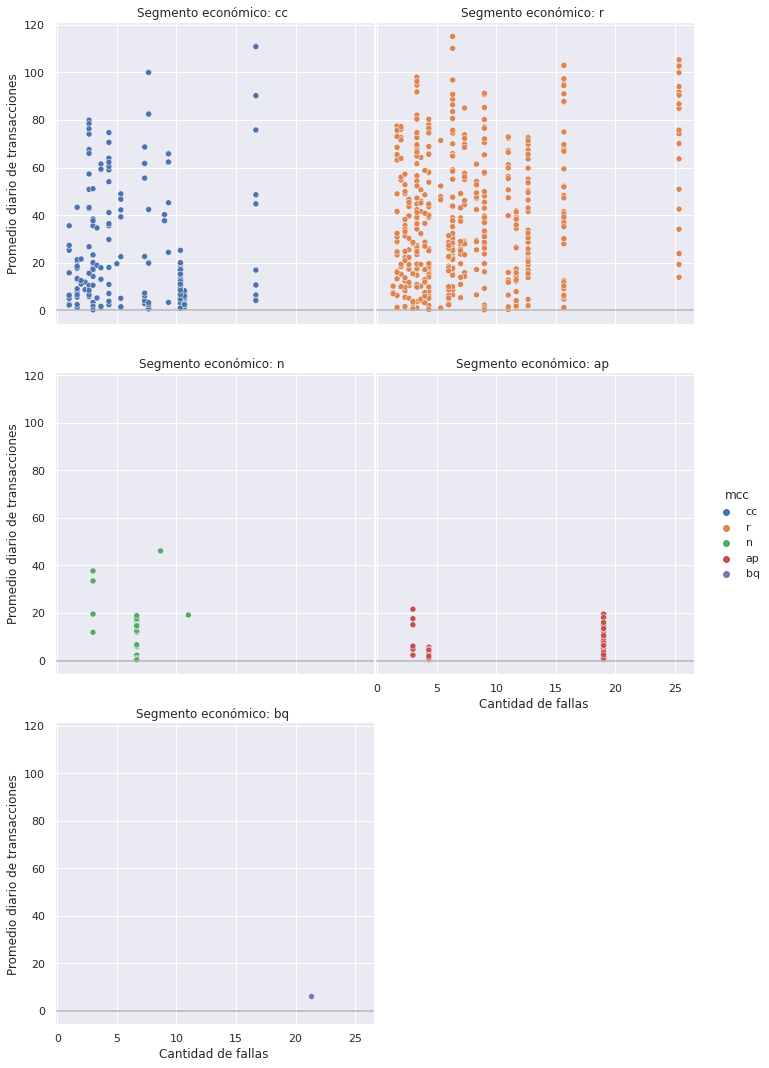

In [36]:
g = sns.relplot(data=df_fallas_fil_big, x="cant_fallas_mes", y="prom_mes", hue="mcc", col="mcc", col_wrap=2)
(g.map(plt.axhline, y=0, color=".7", zorder=2)
  .set_axis_labels("Cantidad de fallas", "Promedio diario de transacciones")
  .set_titles("Segmento económico: {col_name} ")
  .tight_layout(w_pad=0))


 <font size="3"> *En el siguiente grafico se muestran el top de segmentos economicos que tienen  una recurrencia de fallas superiores a los 5 reportes mensuales, en caso de aplicarse alguna medida correctiva estos 5 segmentos serian de prioridad* </font> 

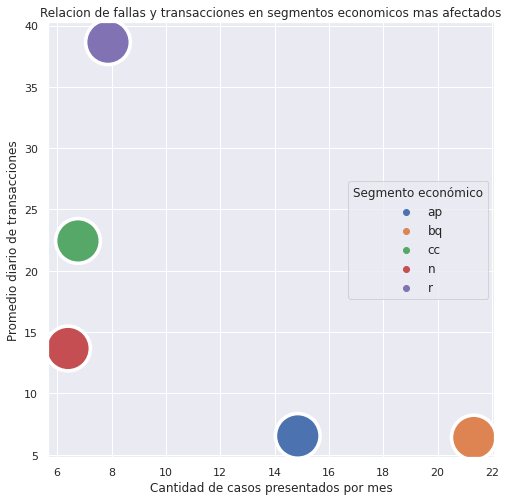

In [37]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='cant_fallas_mes', y='prom_mes', hue='mcc', s=2000,
                data=df_fallas_fil_grp)
plt.title('Relacion de fallas y transacciones en segmentos economicos mas afectados')
plt.xlabel('Cantidad de casos presentados por mes')
plt.ylabel('Promedio diario de transacciones')
plt.legend(title='Segmento económico', loc=7, fontsize='medium')

 <font size="3"> *Del grafico anterior se desprende un analisis posterior que nos permite ver mas claramente la immportancia en terminos de la cantidad de transacciones de los segmentos mas importantes que a su vez tienen un alto indice de reporte de fallas* </font> 

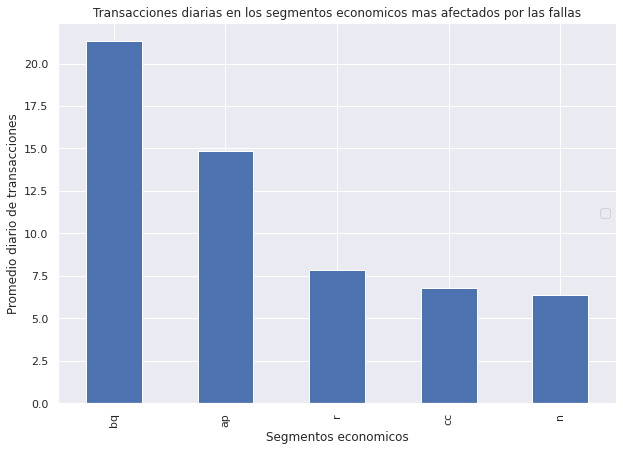

In [38]:
df_fallas_fil_grp[['cant_fallas_mes']].sort_values(['cant_fallas_mes'], ascending=False) \
.plot(figsize=(10,7), kind='bar', stacked=True, sort_columns=True)
plt.title('Transacciones diarias en los segmentos economicos mas afectados por las fallas')
plt.xlabel('Segmentos economicos')
plt.ylabel('Promedio diario de transacciones')
plt.legend([], title='', loc=7, fontsize='medium')

Text(8.300494444444439, 0.5, 'Periodicidad')

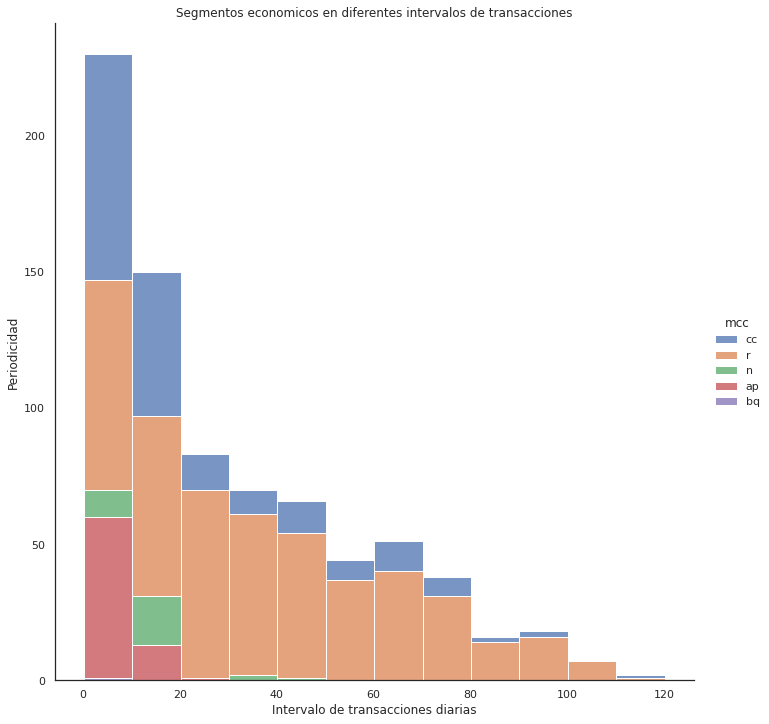

In [39]:
sns.set_style("white")
sns.displot(df_fallas_fil_big, x="prom_mes", hue="mcc", multiple="stack", binwidth=10,height=10)
plt.title('Segmentos economicos en diferentes intervalos de transacciones')
plt.xlabel('Intervalo de transacciones diarias')
plt.ylabel('Periodicidad')

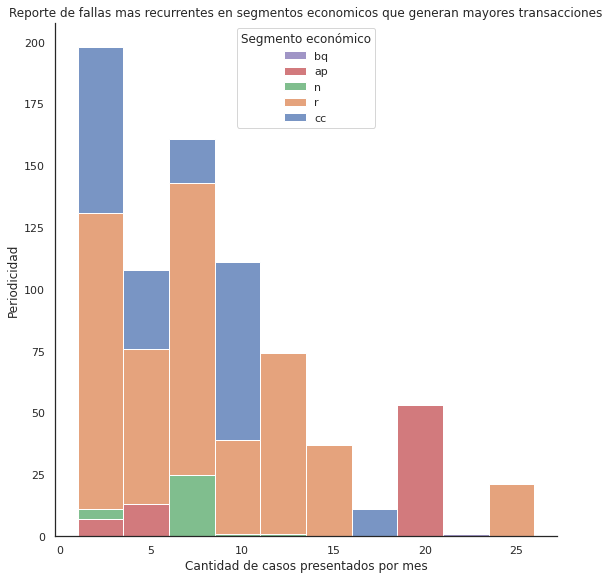

In [40]:
sns.set_style("white")
g = sns.displot(df_fallas_fil_big, x="cant_fallas_mes", hue="mcc", multiple="stack", binwidth=2.5, height=8,
               legend=False)
plt.title('Reporte de fallas mas recurrentes en segmentos economicos que generan mayores transacciones')
plt.xlabel('Cantidad de casos presentados por mes')
plt.ylabel('Periodicidad')
plt.legend(['bq', 'ap','n','r','cc'],title='Segmento económico', loc=9, )


In [41]:
def f_filter_mean2(x):
    return (x['prom_mes']).mean() < 5
df_fallas_fil2 = df_fallas_fil.groupby('mcc').filter(f_filter_mean2)
df_fallas_fil_grp2 = df_fallas_fil2.groupby('mcc').mean()

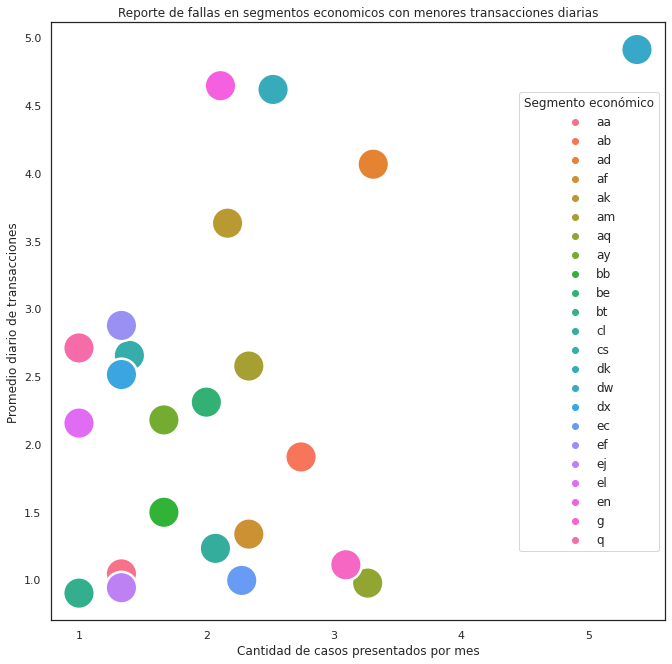

In [42]:
f, ax = plt.subplots(figsize=(11, 11))
sns.set_style("white")
g = sns.scatterplot(x='cant_fallas_mes', y='prom_mes', hue='mcc', s=1000,
                data=df_fallas_fil_grp2)
plt.title('Reporte de fallas en segmentos economicos con menores transacciones diarias')
plt.xlabel('Cantidad de casos presentados por mes')
plt.ylabel('Promedio diario de transacciones')
plt.legend(title='Segmento económico', loc=7, fontsize='medium')

 <font size="3">  </font> 

 <font size="3">  </font> 

## Series de tiempo 
 <font size="3"> *En esta seccion se busca encontrar un desarrollo historico de los ultimos 2 años de las ciudades que mas terminales presentan y como ha evolucionado, se van a tomar el año 2017 y 2018 para esta analisis* </font> 

In [43]:
df_soft['inicio_actividades_pos'] = pd.to_datetime(df_soft['inicio_actividades_pos'])

df_ciudades = df_soft.groupby(['ciudadfin'])['ciudadfin'].count().sort_values(ascending=False).to_frame()
top_ciudades = list(df_ciudades.index)[:10]
top_ciudades

['BOGOTÁ',
 'MEDELLÍN',
 'CALI',
 'BARRANQUILLA',
 'CARTAGENA',
 'BUCARAMANGA',
 'PEREIRA',
 'CÚCUTA',
 'IBAGUÉ',
 'MANIZALES']

In [44]:
top_ciudades = ['BOGOTÁ','MEDELLÍN','CALI','BARRANQUILLA','CARTAGENA','BUCARAMANGA',
                                       'PEREIRA','CÚCUTA','IBAGUÉ','MANIZALES']

df_time = df_soft[df_soft['ciudadfin'].isin(['BOGOTÁ','MEDELLÍN','CALI','BARRANQUILLA','CARTAGENA'])]


### 2018

In [45]:
group = df_time.groupby(['ciudadfin',pd.Grouper(key='inicio_actividades_pos',
                                                freq='1D')])['mcodes'].count().to_frame()
group = group.reset_index()
group['month'] = group['inicio_actividades_pos'].dt.month_name()
group['year'] = group['inicio_actividades_pos'].dt.year
group = group.drop(columns='inicio_actividades_pos')
group = group[group['year']==2018]
group = group.groupby([ 'month','ciudadfin'], sort=False).sum()
group.sample(5)

,,mcodes,year
month,ciudadfin,,
July,MEDELLÍN,329,54486
November,BOGOTÁ,1823,58522
May,CALI,242,50450
June,BARRANQUILLA,186,50450
December,BOGOTÁ,1557,60540


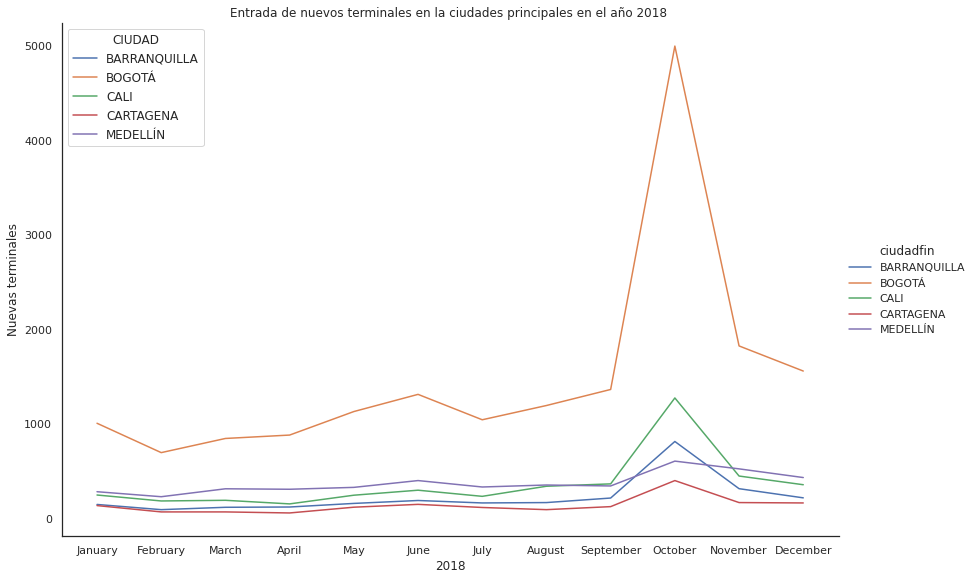

In [46]:
sns.set_style("white")
sns.relplot(x="month", y='mcodes', hue="ciudadfin", kind='line', height=8, aspect=1.5, ci=None,
             data=group, legend=True)
plt.title('Entrada de nuevos terminales en la ciudades principales en el año 2018 ')
plt.xlabel('2018')
plt.ylabel('Nuevas terminales')
plt.legend(title='CIUDAD', loc=2, fontsize='medium')

In [47]:
group = group.pivot_table(values='mcodes', index='month', columns='ciudadfin')
group.replace(np.nan, 0, inplace=True)
group

ciudadfin,BARRANQUILLA,BOGOTÁ,CALI,CARTAGENA,MEDELLÍN
month,,,,,
January,144,1004,244,132,279
February,89,693,181,65,226
March,114,843,188,65,310
April,117,879,150,54,305
May,155,1128,242,115,325
June,186,1310,295,145,397
July,160,1041,230,112,329
August,164,1192,337,89,350
September,212,1362,362,121,340


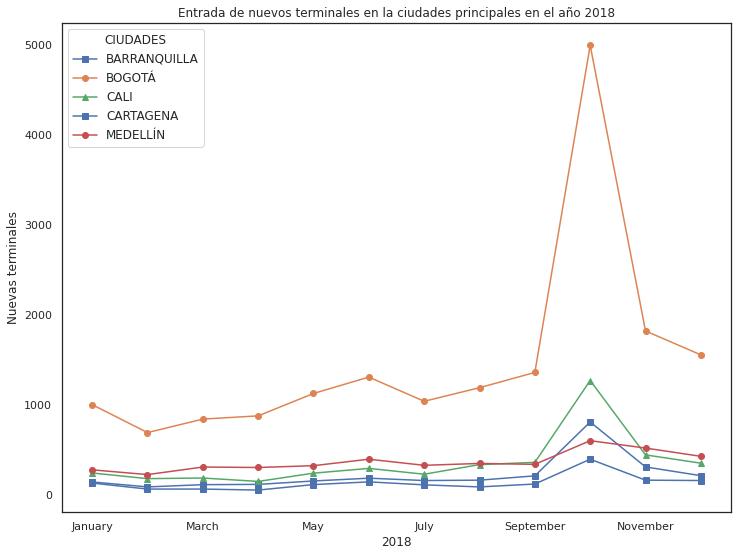

In [48]:
ax = group.plot( figsize=(12,9), title='Entrada de nuevos terminales en la ciudades principales en el año 2018', style=['s-','o-','^-','bs-','r-o'], legend=True)
#ax.legend(['1'])
plt.xlabel('2018')
plt.ylabel('Nuevas terminales')
plt.legend(title='CIUDADES', loc=2, fontsize='medium')
plt.show( )

### 2017

In [49]:
group = df_time.groupby(['ciudadfin',pd.Grouper(key='inicio_actividades_pos',
                                                freq='1D')])['mcodes'].count().to_frame()
group = group.reset_index()
group['month'] = group['inicio_actividades_pos'].dt.month_name()
group['year'] = group['inicio_actividades_pos'].dt.year
group = group.drop(columns='inicio_actividades_pos')
group = group[group['year']==2017]

group = group.groupby([ 'month','ciudadfin'], sort=False).sum()

group.sample(5)

,,mcodes,year
month,ciudadfin,,
October,BOGOTÁ,14,14119
April,BOGOTÁ,10,14119
November,BARRANQUILLA,1,2017
June,BOGOTÁ,12,12102
September,MEDELLÍN,96,52442


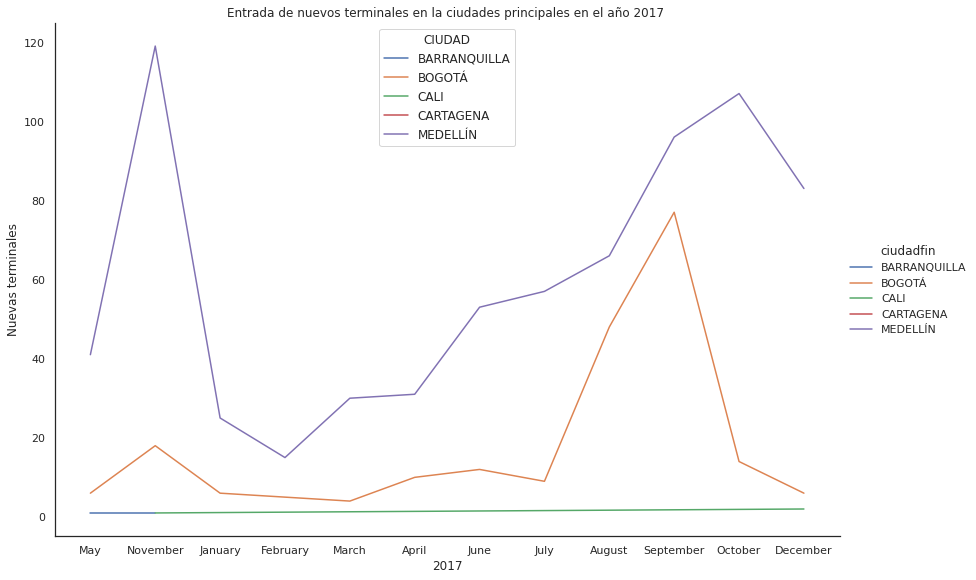

In [50]:
sns.set_style("white")
sns.relplot(x="month", y='mcodes', hue="ciudadfin", kind='line', height=8, aspect=1.5, ci=None,
             data=group, legend=True)
plt.title('Entrada de nuevos terminales en la ciudades principales en el año 2017 ')
plt.xlabel('2017')
plt.ylabel('Nuevas terminales')
plt.legend(title='CIUDAD', loc=9, fontsize='medium')

### 2016

In [51]:
group = df_time.groupby(['ciudadfin',pd.Grouper(key='inicio_actividades_pos',
                                                freq='1D')])['mcodes'].count().to_frame()
group = group.reset_index()
group['month'] = group['inicio_actividades_pos'].dt.month_name()
group['year'] = group['inicio_actividades_pos'].dt.year
group = group.drop(columns='inicio_actividades_pos')
group = group[group['year']==2016]

group = group.groupby([ 'month','ciudadfin'], sort=False).sum()

group.sample(5)

,,mcodes,year
month,ciudadfin,,
July,MEDELLÍN,5,4032
April,BOGOTÁ,1,2016
October,BOGOTÁ,3,6048
March,MEDELLÍN,2,2016
December,MEDELLÍN,32,28224


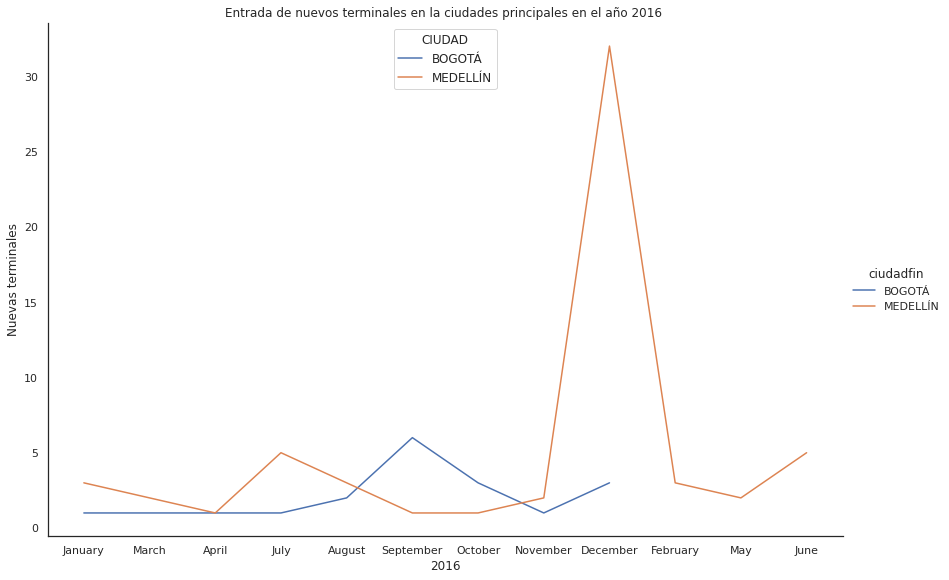

In [52]:
sns.set_style("white")
sns.relplot(x="month", y='mcodes', hue="ciudadfin", kind='line', height=8, aspect=1.5, ci=None,
             data=group, legend=True)
plt.title('Entrada de nuevos terminales en la ciudades principales en el año 2016 ')
plt.xlabel('2016')
plt.ylabel('Nuevas terminales')
plt.legend(title='CIUDAD', loc=9, fontsize='medium')

### 2019

In [53]:
group = df_time.groupby(['ciudadfin',pd.Grouper(key='inicio_actividades_pos',
                                                freq='1D')])['mcodes'].count().to_frame()
group = group.reset_index()
group['month'] = group['inicio_actividades_pos'].dt.month_name()
group['year'] = group['inicio_actividades_pos'].dt.year
group = group.drop(columns='inicio_actividades_pos')
group = group[group['year']==2019]

group = group.groupby([ 'month','ciudadfin'], sort=False).sum()

group.sample(5)

mcodes  year
month    ciudadfin                 
February CARTAGENA          1  2019
March    CARTAGENA          1  2019
         BOGOTÁ            17  2019
February BARRANQUILLA       5  2019
         BOGOTÁ            23  2019

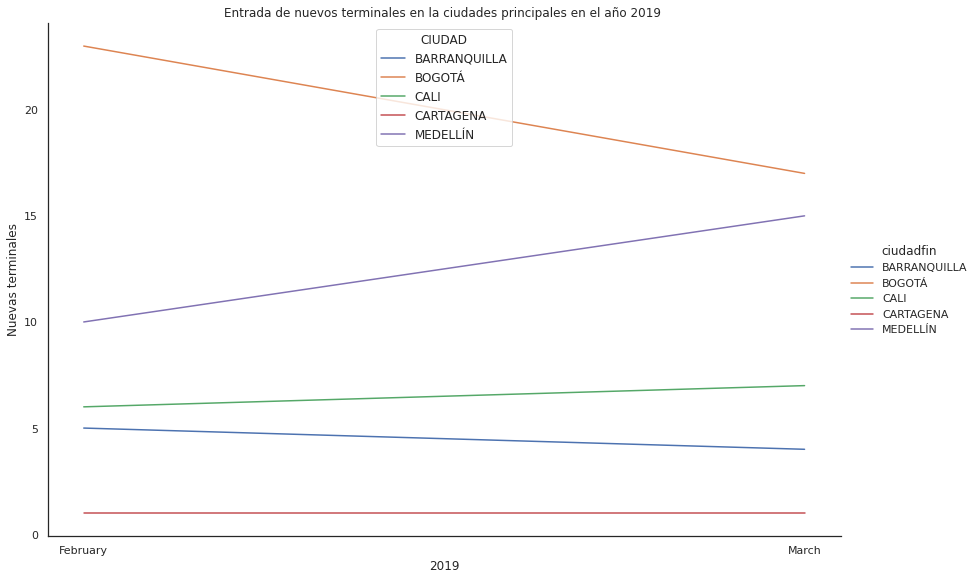

In [54]:
sns.set_style("white")
sns.relplot(x="month", y='mcodes', hue="ciudadfin", kind='line', height=8, aspect=1.5, ci=None,
             data=group, legend=True)
plt.title('Entrada de nuevos terminales en la ciudades principales en el año 2019 ')
plt.xlabel('2019')
plt.ylabel('Nuevas terminales')
plt.legend(title='CIUDAD', loc=9, fontsize='medium')

## Concluciones y recomendaciones 
* * *


<font size="3"> 
<ol>
    
- Es necesario encontrar los motivos por los cuales una gran cantidad de terminales no presentan uso durante largos periodos de tiempo, en Bogota esta cifra supero las 10000 terminales, hay que tener en cuenta que no entro dentro del estudio los terminales inactivos, esto puede reflejar una falta acercamiento con estas tecnologias y tambien resistencia de los usuarios a utilizarlas por diferentes motivos  

</ol>
</font> 

<font size="3"> 
<ol>  
    
- Al momento de excluir de la información información que no era util para el analisis se encontro que puede verse una relación un poco debil pero que puede ser significativa para el grueso de los usuarios, dado que se observa una relación entre las fallas y las transacciones diarias durante los 3 meses de estudio, profundizar en las causas de esas fallas y trabajar para evitarlas puede generar que las transacciones se incrementen ligeramente, pero especialmente no generara traumatismos entre los usuarios.

</ol>
</font> 

<font size="3"> 
<ol>   

- Se presenta una fuerte correlación entre las transacciones de los dias anteriores y los consecuentes, esta observación se puede trasladar tambien en terminos de meses, por lo cual son datos en los que se pueden desarrollar modelos predictivos para analisis futuros, incluso llevandolo al termino de sectores economicos y los momentos donde estos pueden presentar una mayor demanda.
</ol>
</font> 

<font size="3"> 
<ol>  
    
- En las ciudades donde se presenta una mayor cantidad de terminales en el pais, viene con un fuerte incremento en la habilitacion de esta tecnologia, especialmente en los ultimos trimestres de cada año, concentrandose mayoritariamente en octubre

</font> 

## Calidad de los datos 
* * *


<font size="3"> 
<ol>

- En general el conjunto de datos, no presentaba mayores inconvenientes al momento de filtrar depurar la información, no tenia datos nulos ni presento errores en su tipado, no fue necesario standarizar ni normalizar los datos, sin embargo, si falto tener mayor información sobre a que hacian referencia las categorias en algunas columnas, por ejemplo la columan **Mcc** que hace referencia al sector economico no contaba con mas claridad en sus categorias lo que no permitia profundizar con seguridad en los datos asociados a este. 

</ol>
</font> 

<font size="3"> 
<ol>

- Al establecer lo que se quería lograr con los datos se consideraron algunas metricas relacionadas con tendencias, comportamiento y causalidad entre los datos disponbiles, se consideraron solo variables que tenia potencial para ser una base de toma de decisiones en las que se pudieran deprender oportunidades de mejora y detección de fallos, tambien se desprendieron analisis que permitian entender la evolución del mercado y tener un idea clara del comportamiento que ha traido y como a partir de esto podemos generar nociones de como se desarrollara en un futuro.

</ol>
</font> 